<h1>Analizando algoritmos de ordenamiento</h1>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as pl
import time
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [2]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [3]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[4 1 2 0 8 9 7 3 6 5]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [4]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [5]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [10]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [11]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 137


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [12]:
import random as rnd

def exper_analysis(n):
    steps = []
    timeP = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        acct_insertion_sort(l, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP]
    return results

In [13]:
print exper_analysis(10)

[[2, 2, 8, 17, 32, 32, 35, 62, 80, 116], [3.158058457241073e-06, 1.5790292286205357e-06, 5.131844993016746e-06, 9.07941806456808e-06, 1.73693215148259e-05, 1.4606020364739966e-05, 1.6974564207670767e-05, 4.105475994413394e-05, 4.3423303787064766e-05, 6.079262530189064e-05]]


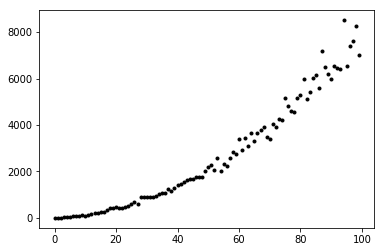

In [14]:
pl.clf()
x = np.arange(100)
res = exper_analysis(100)
y = np.array(res[0])
pl.plot(x, y, 'k.')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

<FONT SIZE=6 COLOR="red">Solución Taller</FONT>

<h2>Merge Sort</h2>

<b>Negro:</b> Operaciones

<b>Rojo :</b> Tiempo

<b>Azul :</b> Complejidad (nlogn)

In [15]:
import random as rnd
import math

def merge_sort(A, acct):
    if len(A) > 1:
        acct.count()
        mid = int(len(A)/2); acct.count()
        lefthalf = A[:mid]; acct.count()
        righthalf = A[mid:]; acct.count()

        merge_sort(lefthalf, acct)
        merge_sort(righthalf, acct)
        
        i=0; acct.count()
        j=0; acct.count()
        k=0; acct.count()
        
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            if lefthalf[i] < righthalf[j]:
                acct.count()
                A[k]=lefthalf[i]; acct.count()
                i=i+1; acct.count()
            else:
                acct.count()
                A[k]=righthalf[j]; acct.count()                
                j=j+1; acct.count()
            
            k=k+1; acct.count()

        while i < len(lefthalf):
            acct.count()
            A[k]=lefthalf[i]; acct.count()
            i=i+1; acct.count()
            k=k+1; acct.count()

        while j < len(righthalf):
            acct.count()
            A[k]=righthalf[j]; acct.count()
            j=j+1; acct.count()
            k=k+1; acct.count()

In [16]:
def exper_analysis_merge(n):
    steps = []
    timeP = []
    comp = []
    acct = Counter()
    for i in range(n):
        if i==0:
            comp.append(0)
        else:
            comp.append(i*(math.log(i)))
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        merge_sort(l, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP, comp]
    return results

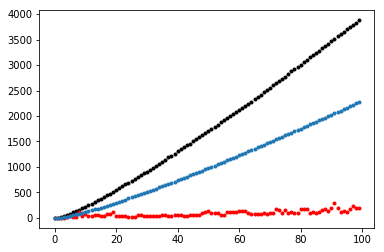

In [17]:
pl.clf()
x = np.arange(100)
res = exper_analysis_merge(100)
y = np.array(res[0])
h = np.array(res[1]) * 100000
c = np.array(res[2]) * 5

pl.plot(x, y, 'k.', h, 'r.', c, '.')

<h2>Quick Sort</h2>

<b>Negro:</b> Operaciones

<b>Rojo :</b> Tiempo

<b>Azul :</b> Complejidad (n^2)

In [18]:
import random as rnd
        
def partition(A, begin, end, acct):
    pivot = begin
    for i in xrange(begin+1, end+1):
        acct.count()
        if A[i] <= A[begin]:
            acct.count()
            pivot += 1; acct.count()
            A[i], A[pivot] = A[pivot], A[i]; acct.count()
    A[pivot], A[begin] = A[begin], A[pivot]; acct.count()
    return pivot


def quicksort_start(A, begin, end, acct):
    if end is None:
        acct.count()
        end = len(A) - 1
    if begin >= end:
        acct.count()
        return
    pivot = partition(A, begin, end, acct); acct.count()
    quicksort_start(A, begin, pivot-1, acct); acct.count()
    quicksort_start(A, pivot+1, end, acct); acct.count()
    
def quickSort(A, acct):
    quicksort_start(A, 0, None, acct)

In [19]:
def exper_analysis_quick(n):
    steps = []
    timeP = []
    comp = []
    acct = Counter()
    for i in range(n):
        comp.append(i*i)
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        quickSort(l, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP, comp]
    return results

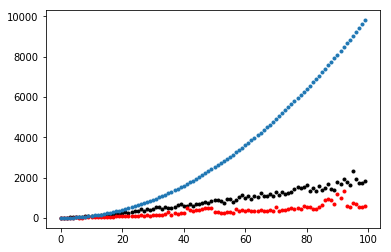

In [20]:
pl.clf()
x = np.arange(100)
res = exper_analysis_quick(100)
y = np.array(res[0])
h = np.array(res[1]) * 1000000
c = np.array(res[2])

pl.plot(x, y, 'k.', h, 'r.', c, '.')